# Hex Map
There are a relatively small number of actions that are taken over the course of a game. Therefore, it is reasonable to derive a strategy, if not for the whole game play-by-play, then by organizing a handful of turns.

One overall strategy in the game is to minimize the number of times the sail action is used. This implies more turns are spent taking two *productive* actions that naturally synergize. For example, using the merchant guild means goods can be sold to acquire money to buy more goods on the same turn. Furthermore, this means sail actions will maximize moving both ships on the same turn, making the most of the movement available bewteen both ships.

A Hex Map will be a useful tool for creating a SeaFall playbook.

In [1]:
import numpy
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot

The hex grid will be stored in a dictionary using 3 coordinates to define the location. 3-dimensional coordintes will be translated into a 2D representation in order to create the grid. The transformation from 3D coordinates to 2D coordinates is done using matrix multiplication. In video games and computer vision this is done routinely to translate rendered 3D graphics into screen coordinates. The website redblobgames.com also provides the transformation matrix.

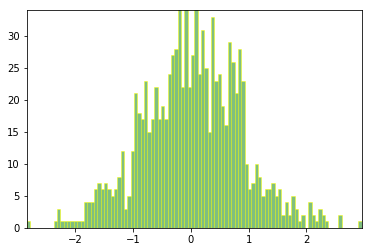

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
plt.show()

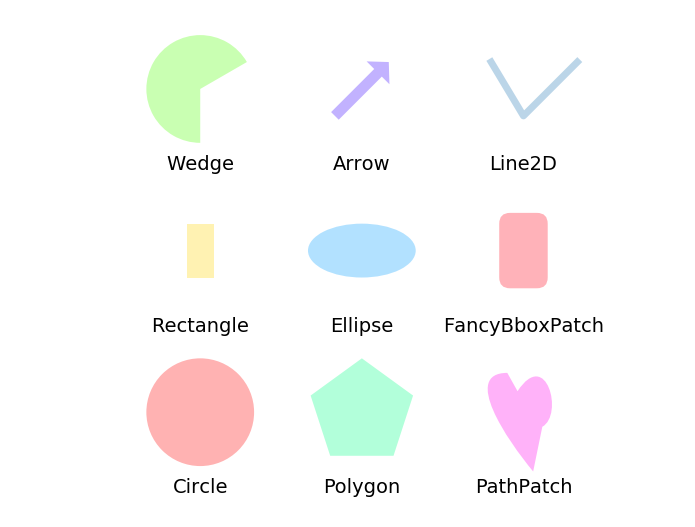

In [3]:
import matplotlib.pyplot as plt
plt.rcdefaults()

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)


fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1, width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115,  0.073]),
    (Path.CURVE4, [-0.03 ,  0.073]),
    (Path.LINETO, [-0.011,  0.039]),
    (Path.CURVE4, [0.043,  0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)
ax.add_line(line)

plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.axis('equal')
plt.axis('off')

plt.show()

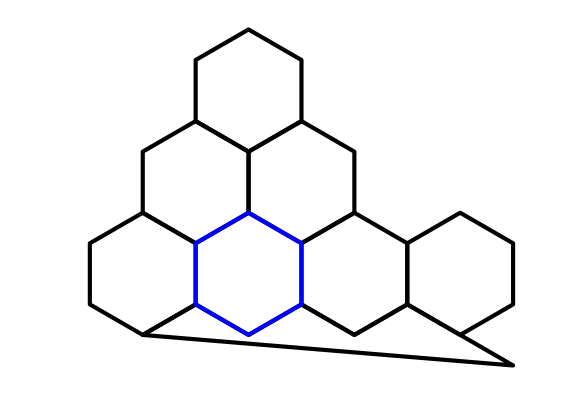

In [4]:
fig, ax = plt.subplots()
patches = []
polygon = mpatches.RegularPolygon((0,0), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)

polygon = mpatches.RegularPolygon((2,0), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
polygon = mpatches.RegularPolygon((3,0), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
polygon = mpatches.RegularPolygon((0.5,np.sqrt(3)/2), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
polygon = mpatches.RegularPolygon((1.5,np.sqrt(3)/2), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
polygon = mpatches.RegularPolygon((1.0,np.sqrt(3)), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.0, -1/(np.sqrt(3))]),
    (Path.LINETO, [0.5, -1/(2*np.sqrt(3))]),
    (Path.LINETO, [1.0,  -1/(np.sqrt(3))]),
    (Path.LINETO, [1.5, -1/(2*np.sqrt(3))]),
    (Path.LINETO, [2.0,  -1/(np.sqrt(3))]),
    (Path.LINETO, [2.5, -1/(2*np.sqrt(3))]),
    (Path.LINETO, [3.5,  -3/(2*np.sqrt(3))]),
    (Path.CLOSEPOLY, [0.0, -1/(np.sqrt(3))])
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path,                                   linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(patch)

polygon = mpatches.RegularPolygon((1,0), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="b",
                                 fill=False)
patches.append(polygon)
collection = PatchCollection(patches, match_original=True)
ax.add_collection(collection)
plt.axis('equal')
plt.axis('off')
plt.show()

In [5]:
class SeafallPlayerTurn:
    def __init__(self):
        print("hello")

In [6]:
class SeafallIsland:
    def __init__(self):
        print("hello")

In [7]:
hexgrid = {}
hexgrid_keys = []
hexgrid_keys.append("coastal_waters")
hexgrid_keys.append("home_harbor_purple")
hexgrid_keys.append("home_harbor_red")
hexgrid_keys.append("home_harbor_gray")
hexgrid_keys.append("home_harbor_blue")
hexgrid_keys.append("home_harbor_green")
# row 0
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(0*numpy.ones(9, dtype=numpy.int), numpy.arange(0,9), numpy.arange(0,9))]
# row 1
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(1*numpy.ones(10, dtype=numpy.int), numpy.arange(-1,9), numpy.arange(0,10))]
# row 2
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(2*numpy.ones(9, dtype=numpy.int), numpy.arange(-1,8), numpy.arange(1,10))]
# row 3
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(3*numpy.ones(10, dtype=numpy.int), numpy.arange(-2,8), numpy.arange(1,11))]
# row 4
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(4*numpy.ones(9, dtype=numpy.int), numpy.arange(-2,7), numpy.arange(2,11))]
# row 5
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(5*numpy.ones(10, dtype=numpy.int), numpy.arange(-3,7), numpy.arange(2,12))]
# row 6
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(6*numpy.ones(9, dtype=numpy.int), numpy.arange(-3,6), numpy.arange(3,12))]
# row 7
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(7*numpy.ones(10, dtype=numpy.int), numpy.arange(-4,6), numpy.arange(3,13))]
# row 8
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(8*numpy.ones(9, dtype=numpy.int), numpy.arange(-4,5), numpy.arange(4,13))]
# row 9
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(9*numpy.ones(10, dtype=numpy.int), numpy.arange(-5,5), numpy.arange(4,14))]
# row 10
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(10*numpy.ones(9, dtype=numpy.int), numpy.arange(-5,4), numpy.arange(5,14))]
# row 11
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(11*numpy.ones(10, dtype=numpy.int), numpy.arange(-6,4), numpy.arange(5,15))]
# row 12
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(12*numpy.ones(9, dtype=numpy.int), numpy.arange(-6,3), numpy.arange(6,15))]
# row 13
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(13*numpy.ones(10, dtype=numpy.int), numpy.arange(-7,3), numpy.arange(6,16))]
# row 14
hexgrid_keys = hexgrid_keys + [tuple(i) for i in zip(14*numpy.ones(9, dtype=numpy.int), numpy.arange(-7,2), numpy.arange(7,16))]

In [8]:
hexgrid_keys

['coastal_waters',
 'home_harbor_purple',
 'home_harbor_red',
 'home_harbor_gray',
 'home_harbor_blue',
 'home_harbor_green',
 (0, 0, 0),
 (0, 1, 1),
 (0, 2, 2),
 (0, 3, 3),
 (0, 4, 4),
 (0, 5, 5),
 (0, 6, 6),
 (0, 7, 7),
 (0, 8, 8),
 (1, -1, 0),
 (1, 0, 1),
 (1, 1, 2),
 (1, 2, 3),
 (1, 3, 4),
 (1, 4, 5),
 (1, 5, 6),
 (1, 6, 7),
 (1, 7, 8),
 (1, 8, 9),
 (2, -1, 1),
 (2, 0, 2),
 (2, 1, 3),
 (2, 2, 4),
 (2, 3, 5),
 (2, 4, 6),
 (2, 5, 7),
 (2, 6, 8),
 (2, 7, 9),
 (3, -2, 1),
 (3, -1, 2),
 (3, 0, 3),
 (3, 1, 4),
 (3, 2, 5),
 (3, 3, 6),
 (3, 4, 7),
 (3, 5, 8),
 (3, 6, 9),
 (3, 7, 10),
 (4, -2, 2),
 (4, -1, 3),
 (4, 0, 4),
 (4, 1, 5),
 (4, 2, 6),
 (4, 3, 7),
 (4, 4, 8),
 (4, 5, 9),
 (4, 6, 10),
 (5, -3, 2),
 (5, -2, 3),
 (5, -1, 4),
 (5, 0, 5),
 (5, 1, 6),
 (5, 2, 7),
 (5, 3, 8),
 (5, 4, 9),
 (5, 5, 10),
 (5, 6, 11),
 (6, -3, 3),
 (6, -2, 4),
 (6, -1, 5),
 (6, 0, 6),
 (6, 1, 7),
 (6, 2, 8),
 (6, 3, 9),
 (6, 4, 10),
 (6, 5, 11),
 (7, -4, 3),
 (7, -3, 4),
 (7, -2, 5),
 (7, -1, 6),
 (7, 0, 7),


In [9]:
class SeaFallMap:
    def __init__(self):
        """
        This object contains a list of all the coordinates for the SeaFall game board stored in hexgrid_keys.
        """
        self.hexgrid = {}
        
        self.hexgrid_keys = []
        
        self.hexgrid_keys.append("coastal_waters")
        
        self.hexgrid_keys.append("home_harbor_purple")
        
        self.hexgrid_keys.append("home_harbor_red")
        
        self.hexgrid_keys.append("home_harbor_gray")
        
        self.hexgrid_keys.append("home_harbor_blue")
        
        self.hexgrid_keys.append("home_harbor_green")
        
        # row 0
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(0*numpy.ones(9, dtype=numpy.int), numpy.arange(0,9), numpy.arange(0,9))]
        
        # row 1
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(1*numpy.ones(10, dtype=numpy.int), numpy.arange(-1,9), numpy.arange(0,10))]
        
        # row 2
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(2*numpy.ones(9, dtype=numpy.int), numpy.arange(-1,8), numpy.arange(1,10))]
        
        # row 3
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(3*numpy.ones(10, dtype=numpy.int), numpy.arange(-2,8), numpy.arange(1,11))]
        
        # row 4
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(4*numpy.ones(9, dtype=numpy.int), numpy.arange(-2,7), numpy.arange(2,11))]
        
        # row 5
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(5*numpy.ones(10, dtype=numpy.int), numpy.arange(-3,7), numpy.arange(2,12))]
        
        # row 6
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(6*numpy.ones(9, dtype=numpy.int), numpy.arange(-3,6), numpy.arange(3,12))]
        
        # row 7
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(7*numpy.ones(10, dtype=numpy.int), numpy.arange(-4,6), numpy.arange(3,13))]
        
        # row 8
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(8*numpy.ones(9, dtype=numpy.int), numpy.arange(-4,5), numpy.arange(4,13))]
        
        # row 9
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(9*numpy.ones(10, dtype=numpy.int), numpy.arange(-5,5), numpy.arange(4,14))]
        
        # row 10
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(10*numpy.ones(9, dtype=numpy.int), numpy.arange(-5,4), numpy.arange(5,14))]
        
        # row 11
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(11*numpy.ones(10, dtype=numpy.int), numpy.arange(-6,4), numpy.arange(5,15))]
        
        # row 12
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(12*numpy.ones(9, dtype=numpy.int), numpy.arange(-6,3), numpy.arange(6,15))]
        
        # row 13
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(13*numpy.ones(10, dtype=numpy.int), numpy.arange(-7,3), numpy.arange(6,16))]
        
        # row 14
        self.hexgrid_keys = self.hexgrid_keys + \
        [tuple(i) for i in zip(14*numpy.ones(9, dtype=numpy.int), numpy.arange(-7,2), numpy.arange(7,16))]
        
        self.hexgrid_patches = []

In [10]:
smap = SeaFallMap()

In [11]:
smap.hexgrid_keys

['coastal_waters',
 'home_harbor_purple',
 'home_harbor_red',
 'home_harbor_gray',
 'home_harbor_blue',
 'home_harbor_green',
 (0, 0, 0),
 (0, 1, 1),
 (0, 2, 2),
 (0, 3, 3),
 (0, 4, 4),
 (0, 5, 5),
 (0, 6, 6),
 (0, 7, 7),
 (0, 8, 8),
 (1, -1, 0),
 (1, 0, 1),
 (1, 1, 2),
 (1, 2, 3),
 (1, 3, 4),
 (1, 4, 5),
 (1, 5, 6),
 (1, 6, 7),
 (1, 7, 8),
 (1, 8, 9),
 (2, -1, 1),
 (2, 0, 2),
 (2, 1, 3),
 (2, 2, 4),
 (2, 3, 5),
 (2, 4, 6),
 (2, 5, 7),
 (2, 6, 8),
 (2, 7, 9),
 (3, -2, 1),
 (3, -1, 2),
 (3, 0, 3),
 (3, 1, 4),
 (3, 2, 5),
 (3, 3, 6),
 (3, 4, 7),
 (3, 5, 8),
 (3, 6, 9),
 (3, 7, 10),
 (4, -2, 2),
 (4, -1, 3),
 (4, 0, 4),
 (4, 1, 5),
 (4, 2, 6),
 (4, 3, 7),
 (4, 4, 8),
 (4, 5, 9),
 (4, 6, 10),
 (5, -3, 2),
 (5, -2, 3),
 (5, -1, 4),
 (5, 0, 5),
 (5, 1, 6),
 (5, 2, 7),
 (5, 3, 8),
 (5, 4, 9),
 (5, 5, 10),
 (5, 6, 11),
 (6, -3, 3),
 (6, -2, 4),
 (6, -1, 5),
 (6, 0, 6),
 (6, 1, 7),
 (6, 2, 8),
 (6, 3, 9),
 (6, 4, 10),
 (6, 5, 11),
 (7, -4, 3),
 (7, -3, 4),
 (7, -2, 5),
 (7, -1, 6),
 (7, 0, 7),


To convert from the 3d coordinates of the hex grid onto a flat 2d surface will require a transformation. This transformation is common problem in computer games where 3d objects are being simulated and then projected onto a screen. This conversion from 3d to screen coordinates involves more than just a projection of 3d coordinates on a plane and involves other affine movement. The website redblobgames.com has extensive information on hex grids and also an implementation of the transformation from 3d to 2d.

In [12]:
orientation_layout_pointy = [numpy.sqrt(3.0), numpy.sqrt(3.0)/2, 0.0, 3.0/2, numpy.sqrt(3.0)/3, -1.0/3, 0.0, 2.0/3, 1.0/2]

In [13]:
def hex_to_pixel(layout, grid, size, origin):
    x = (layout[0]*grid[0] + layout[1]*grid[1])*size + origin[0]
    y = (layout[2]*grid[0] + layout[3]*grid[1])*size + origin[1]
    return [x, y]

In [22]:
layout_pointy = [numpy.sqrt(3.0), numpy.sqrt(3.0)/2, 0.0, 3.0/2, numpy.sqrt(3.0)/3, -1.0/3, 0.0, 2.0/3, 1.0/2]
layout_flat = [3.0 / 2, 0.0, numpy.sqrt(3.0) / 2, numpy.sqrt(3.0), 2.0 / 3, 0.0, -1.0 / 3, numpy.sqrt(3.0) / 3, 0.0]
size = 1.0/numpy.sqrt(3.0) #This value will make some of the 2d coordinate values round.
origin = [0,0,0]

In [15]:
hex_to_pixel(layout_pointy, [1,-1,0], size, origin)

[0.5, -0.86602540378443882]

In [16]:
-0.5/n[0]*n[1]

-0.0

In [69]:
def seafall_plot_hexgrid(smap):
    
    if not isinstance(smap, SeaFallMap):
        
        raise ValueError('The *smap* input variable is not a SeaFallMap object.')
    
    smap.hexgrid_patches = []
    
    for i in smap.hexgrid_keys:
        
        if (type(i) is tuple) and (len(i) is 3):
            
            smap.hexgrid_patches.append(seafall_hex_patch(i))
            
        elif i is "coastal_waters":
            
            print("nah")

    smap.hexgrid_patches.append(seafall_coastal_waters_patch())
    
    return



def seafall_hex_patch(loc):
    
    layout_flat = [3.0 / 2, 0.0, numpy.sqrt(3.0) / 2, 
                   numpy.sqrt(3.0), 2.0 / 3, 0.0, 
                   -1.0 / 3, numpy.sqrt(3.0) / 3, 0.0]
    
    origin = [0,0,0]
    
    size = 1.0/numpy.sqrt(3.0) 
    
    hex2d = hex_to_pixel(layout_flat, loc, size, origin)
    
    hex_patch = mpatches.RegularPolygon(hex2d, 
                                        6, 
                                        size, 
                                        orientation=np.pi/2,
                                        linestyle="solid",
                                        linewidth=3,
                                        color="k",
                                        fill=False)
    return hex_patch

def seafall_coastal_waters_patch():
    
    # row -1
    hexgrid_keys = [tuple(i) for i in zip(-1*numpy.ones(10, dtype=numpy.int), numpy.arange(0,10), numpy.arange(-1,9))]
    
    hexgrid_patches = []
    
    for i in hexgrid_keys:
            
        hexgrid_patches.append(seafall_hex_patch(i))
    
    hexgrid_verts = []
    
    for i in hexgrid_patches:
            
        hexgrid_verts.append(i.get_verts())
    
    Path = mpath.Path
    
    path_data = [
        (Path.MOVETO, hexgrid_verts[0][3]),
        (Path.LINETO, hexgrid_verts[0][2]),
        (Path.LINETO, hexgrid_verts[0][1]),
        (Path.LINETO, hexgrid_verts[0][0]),
        (Path.LINETO, hexgrid_verts[1][0]),
        (Path.LINETO, hexgrid_verts[2][0]),
        (Path.LINETO, hexgrid_verts[3][0]),
        (Path.LINETO, hexgrid_verts[4][0]),
        (Path.LINETO, hexgrid_verts[5][0]),
        (Path.LINETO, hexgrid_verts[6][0]),
        (Path.LINETO, hexgrid_verts[7][0]),
        (Path.LINETO, hexgrid_verts[8][0]),
        (Path.LINETO, hexgrid_verts[9][0]),
        (Path.LINETO, hexgrid_verts[9][6]),
        (Path.LINETO, hexgrid_verts[9][5]),
        (Path.LINETO, hexgrid_verts[9][4]),
        (Path.LINETO, hexgrid_verts[9][3])
        ]
    codes, verts = zip(*path_data)
    path = mpath.Path(verts, codes)
    cw_patch = mpatches.PathPatch(path,                                   linestyle="solid",
                                      linewidth=3,
                                     color="k",
                                     fill=False)
    
    return cw_patch


In [70]:
seafall_plot_hexgrid(smap)

nah


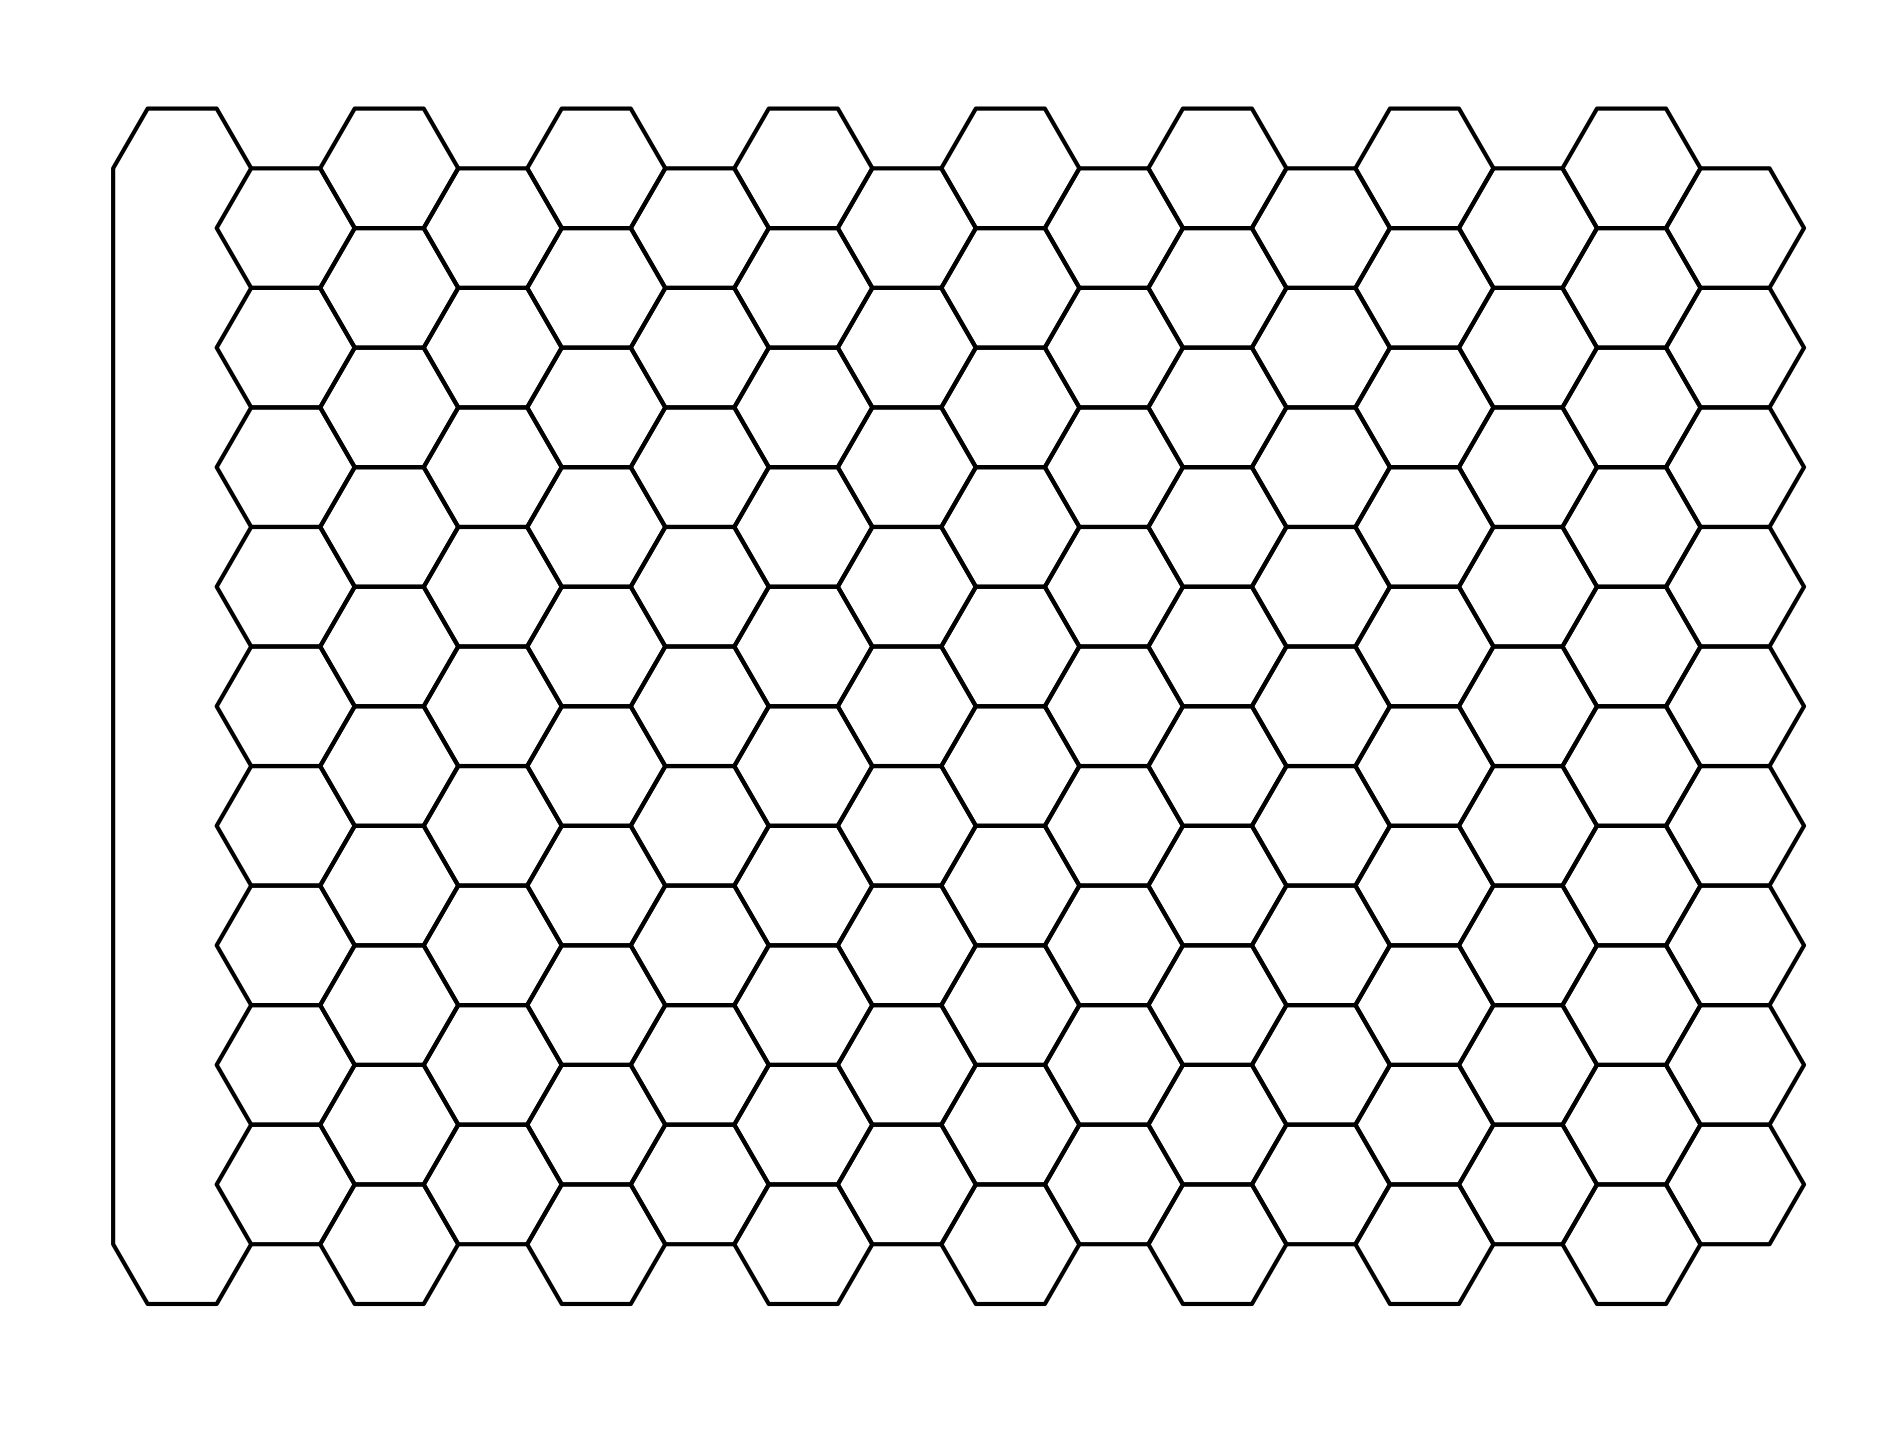

In [71]:
fig, ax = plt.subplots(figsize=(24, 18))
collection = PatchCollection(smap.hexgrid_patches, match_original=True)
ax.add_collection(collection)
plt.axis('equal')
plt.axis('off')
plt.show()

In [45]:
test_patch = smap.hexgrid_patches[0]

In [48]:
x = test_patch.get_verts()

In [49]:
x

array([[ -5.77350269e-01,   7.07050159e-17],
       [ -2.88675135e-01,  -5.00000000e-01],
       [  2.88675135e-01,  -5.00000000e-01],
       [  5.77350269e-01,  -1.41410032e-16],
       [  2.88675135e-01,   5.00000000e-01],
       [ -2.88675135e-01,   5.00000000e-01],
       [ -5.77350269e-01,   7.07050159e-17]])

In [54]:
x[0][0]
1/numpy.sqrt(3.0)

0.57735026918962584

In [52]:
hexgrid_row0 = [i for i in smap.hexgrid_keys if isrow0(i)]

TypeError: 'str' object is not callable